##Teste para aplicaçãão de técnicas de NLP para Ouvidoria da Dircom
####
colaboração: Fast.ai, Ami Aram,  Esa Pekka Tapani 

## Pegando o dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive',)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


In [ ]:
#from pandas import read_csv
#df = read_csv('drive/My Drive/ia_projects/datasets/tcu-assunto-sumario.csv')

In [ ]:
import pandas as pd


from pandas import read_excel
df_sac_2017 = pd.read_excel('drive/My Drive/ia_projects/cni_ouvidoria/datasets/SAC - MSG 2017 - new.xlsx', index_col=0) 
df_sac_2018 = pd.read_excel('drive/My Drive/ia_projects/cni_ouvidoria/datasets/msg_sac_2018.xlsx', index_col=0) 
df_sac_2018_2019 = pd.read_excel('drive/My Drive/ia_projects/cni_ouvidoria/datasets/df_sac_2018_2019_append4.xlsx', index_col=0) 

In [ ]:
df_sac=df_sac_2018_2019

In [ ]:
df_sac.columns

Index(['Número da Ocorrência', 'Data de Abertura', 'Desc',
       'Árvore de Assuntos', 'Descrição'],
      dtype='object')

In [ ]:
df_sac.rename(columns={"Descrição":"Desc","Descrição_new":"Descrição"},inplace=True)

In [ ]:
del df_sac["Desc"]

In [ ]:
df_sac.head()

,assunto,sumario
0,banco de talentos,Bom dia. Sou funcionária terceirizada da empre...
1,banco de talentos,Boa tarde. Estou procurando algum conteúdo sob...
2,banco de talentos,"Trabalho como técnico de áudio, vídeo e lousa ..."
3,banco de talentos,Disponho de uma vaga para Operador de Produçã...
4,banco de talentos,Boa Tarde gostaria de curriculos de Tecnico e...


In [ ]:
df_sac[['Árvore de Assuntos','Descrição']].groupby(['Árvore de Assuntos'])['Descrição'].count().nlargest(20)

Árvore de Assuntos
Matrículas/Cursos                 3963
Outros Assuntos                    495
Banco de Talentos                  466
Dificuldade com o ambiente EAD     367
Jovem Aprendiz                     358
Certificados                       271
Parceria/ Patrocínio               157
Publicação                         145
Relações do Trabalho               104
Cadastro de Fornecedores            94
Estágios                            91
Como se associar                    90
Matrículas/Cursos - SESI            74
Catálogo de Fornecedores            71
Estudos e Pesquisa                  66
Cadastro de Indústrias              62
Programas                           56
Eventos/Prêmios                     48
Torneio de Robótica                 48
Sesinho                             34
Name: Descrição, dtype: int64

In [ ]:
df_sac.head(5)

,Número da Ocorrência,Data de Abertura,Árvore de Assuntos,Descrição
Título da Ocorrência,,,,
Banco de talentos,OCOR-07041-S1Q6K9,2018-12-21 10:47:00,Banco de Talentos,Bom dia. Sou funcionária terceirizada da empre...
Banco de talentos,OCOR-07036-V8K9X3,2018-12-20 18:42:00,Banco de Talentos,Boa tarde. Estou procurando algum conteúdo sob...
Banco de talentos,OCOR-06956-Z8B4G6,2018-12-17 16:26:00,Banco de Talentos,"Trabalho como técnico de áudio, vídeo e lousa ..."
Banco de talentos,OCOR-06987-T9R9D9,2018-12-17 07:16:00,Banco de Talentos,Disponho de uma vaga para Operador de Produçã...
Banco de talentos,OCOR-06955-N6Z5D0,2018-12-14 08:40:00,Banco de Talentos,Boa Tarde gostaria de curriculos de Tecnico e...


In [ ]:
df_sac.sample().values[0]

array(['OCOR-06715-S4R1B4', Timestamp('2018-11-30 04:00:00'),
       'Matrículas/Cursos', ' informação de curso'], dtype=object)

In [ ]:
df_sac.shape

(7232, 4)

In [ ]:
df_sac.dropna(inplace=True)

In [ ]:
df_sac.shape

(7208, 4)

## Normalização dos dados
Tentando realizar o match da maior quantidade posível de assuntos, normalizei os assuntos, removendo acentos, letras maíusculas, pontuação e espaços em brancos no início e no final.

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


In [ ]:
from unidecode import unidecode
import re


In [ ]:
def normaliza_assunto(x):
    return re.sub("[^a-zA-Z]"," ",unidecode(x).lower()).strip()

In [ ]:
df_sac.columns

Index(['Número da Ocorrência', 'Data de Abertura', 'Árvore de Assuntos',
       'Descrição'],
      dtype='object')

In [ ]:
df_sac = df_sac.rename(columns={'Árvore de Assuntos': 'Assunto'})
df_sac = df_sac.rename(columns={'Data de Abertura': 'Data_Abertura'})

In [ ]:
df_sac.columns

Index(['Número da Ocorrência', 'Data_Abertura', 'Assunto', 'Descrição'], dtype='object')

In [ ]:
df_sac.Assunto

Título da Ocorrência
Banco de talentos           Banco de Talentos
Banco de talentos           Banco de Talentos
Banco de talentos           Banco de Talentos
Banco de talentos           Banco de Talentos
Banco de talentos           Banco de Talentos
                                  ...        
Informações sobre cursos    Matrículas/Cursos
Informaçõe sobre cursos     Matrículas/Cursos
Certificações                    Certificados
Informações sobre cursos    Matrículas/Cursos
Jovem aprendiz                 Jovem Aprendiz
Name: Assunto, Length: 7208, dtype: object

In [ ]:
df_sac['Assunto'] = df_sac.Assunto.apply(normaliza_assunto)

In [ ]:
df_sac[['Assunto','Descrição']].groupby(['Assunto'])['Descrição'].count().nlargest(20)

Assunto
matriculas cursos                 3963
outros assuntos                    495
banco de talentos                  466
dificuldade com o ambiente ead     367
jovem aprendiz                     358
certificados                       271
parceria  patrocinio               157
publicacao                         145
relacoes do trabalho               104
cadastro de fornecedores            94
estagios                            91
como se associar                    90
matriculas cursos   sesi            74
catalogo de fornecedores            71
estudos e pesquisa                  66
cadastro de industrias              62
programas                           56
eventos premios                     48
torneio de robotica                 48
sesinho                             34
Name: Descrição, dtype: int64

In [ ]:
# https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87
################### df_sac_idx = df_sac.set_index('assunto')
################### df_sac.loc['outros assuntos'] 

In [ ]:
df_sac.head(5)

,Número da Ocorrência,Data_Abertura,Assunto,Descrição
Título da Ocorrência,,,,
Banco de talentos,OCOR-07041-S1Q6K9,2018-12-21 10:47:00,banco de talentos,Bom dia. Sou funcionária terceirizada da empre...
Banco de talentos,OCOR-07036-V8K9X3,2018-12-20 18:42:00,banco de talentos,Boa tarde. Estou procurando algum conteúdo sob...
Banco de talentos,OCOR-06956-Z8B4G6,2018-12-17 16:26:00,banco de talentos,"Trabalho como técnico de áudio, vídeo e lousa ..."
Banco de talentos,OCOR-06987-T9R9D9,2018-12-17 07:16:00,banco de talentos,Disponho de uma vaga para Operador de Produçã...
Banco de talentos,OCOR-06955-N6Z5D0,2018-12-14 08:40:00,banco de talentos,Boa Tarde gostaria de curriculos de Tecnico e...


In [ ]:
df_sac.sample().values[0]

array(['OCOR-03917-B9G7T7', Timestamp('2018-05-28 11:40:00'),
       'matriculas cursos',
       ' Bom dia, Trabalho no SENAI, e fiz a matricula no curso Resiliência e preciso fazer o curso até dia 31/05, só que desde sábado (27.05.2018) tentei abrir o conteúdo do curso e não estou conseguindo. Gostaria de saber o que está acontecendo, uma vez que fiz várias tentativas em pcs diferente e não obtive exito. Atenciosamente, Maria do Socorro Moraes Fontenele Enviado em: 28/05/2018 11:40'],
      dtype=object)

In [ ]:
#quantidades de labels
df_sac['Assunto'].unique().size

37

In [ ]:
df_sac.columns

Index(['Número da Ocorrência', 'Data_Abertura', 'Assunto', 'Descrição'], dtype='object')

In [ ]:
del df_sac['Número da Ocorrência']

In [ ]:
del df_sac['Data_Abertura']

In [ ]:
df_sac = df_sac.rename(columns={'Descrição': 'Descricao'})

In [ ]:
df_sac.columns

Index(['Assunto', 'Descricao'], dtype='object')

In [ ]:
df_sac.index

Index(['Banco de talentos', 'Banco de talentos', 'Banco de talentos',
       'Banco de talentos', 'Banco de talentos',
       'Mundo SENAI - Banco de Talentos', 'Mundo SENAI - Banco de Talentos',
       'Banco de talentos', 'Banco de talentos',
       'Mundo SENAI - Banco de Talentos',
       ...
       'Informações sobre cursos', 'Informações sobre cursos',
       'Informações diversas', 'Informações sobre cursos', 'Como se associar',
       'Informações sobre cursos', 'Informaçõe sobre cursos', 'Certificações',
       'Informações sobre cursos', 'Jovem aprendiz'],
      dtype='object', name='Título da Ocorrência', length=7208)

In [ ]:
df_sac.index.names = ['Titulo']

In [ ]:
type(df_sac.index)

pandas.core.indexes.base.Index

In [ ]:
df_sac_outro_assuntos = df_sac[df_sac["Assunto"]== "outros assuntos"]


In [ ]:
df_sac_outro_assuntos.to_excel("df_sac_2018_2019_outros_assuntos.xlsx",encoding="utf-8", index=False)

In [ ]:
df_sac = df_sac[df_sac["Assunto"]!= "outros assuntos"] 

In [ ]:
df_sac[['Assunto','Descricao']].groupby(['Assunto'])['Descricao'].count().nlargest(20)

Assunto
matriculas cursos                 3963
banco de talentos                  466
dificuldade com o ambiente ead     367
jovem aprendiz                     358
certificados                       271
parceria  patrocinio               157
publicacao                         145
relacoes do trabalho               104
cadastro de fornecedores            94
estagios                            91
como se associar                    90
matriculas cursos   sesi            74
catalogo de fornecedores            71
estudos e pesquisa                  66
cadastro de industrias              62
programas                           56
eventos premios                     48
torneio de robotica                 48
sesinho                             34
contribuicao social                 23
Name: Descricao, dtype: int64

In [ ]:
df_sac = df_sac.reset_index()

In [ ]:
df_sac.columns

Index(['Titulo', 'Assunto', 'Descricao'], dtype='object')

In [ ]:
df_sac.head(5)

,Titulo,Assunto,Descricao
0,Banco de talentos,banco de talentos,Bom dia. Sou funcionária terceirizada da empre...
1,Banco de talentos,banco de talentos,Boa tarde. Estou procurando algum conteúdo sob...
2,Banco de talentos,banco de talentos,"Trabalho como técnico de áudio, vídeo e lousa ..."
3,Banco de talentos,banco de talentos,Disponho de uma vaga para Operador de Produçã...
4,Banco de talentos,banco de talentos,Boa Tarde gostaria de curriculos de Tecnico e...


In [ ]:
df_sac.columns

Index(['Titulo', 'Assunto', 'Descricao'], dtype='object')

In [ ]:
df_sac.iloc[0]['Assunto']


'banco de talentos'

In [ ]:
del df_sac['Titulo']

In [ ]:
df_sac.head(5)

,Assunto,Descricao
0,banco de talentos,Bom dia. Sou funcionária terceirizada da empre...
1,banco de talentos,Boa tarde. Estou procurando algum conteúdo sob...
2,banco de talentos,"Trabalho como técnico de áudio, vídeo e lousa ..."
3,banco de talentos,Disponho de uma vaga para Operador de Produçã...
4,banco de talentos,Boa Tarde gostaria de curriculos de Tecnico e...


In [ ]:
df_sac = df_sac.rename(columns={'Descricao': 'sumario'})

In [ ]:
df_sac = df_sac.rename(columns={'Assunto': 'assunto'})

## tokenização

In [ ]:
from fastai.text import *

In [ ]:
#tokenizador
tokenizer = Tokenizer(lang='pt', n_cpus=8)
#vocabulario
with open('drive/My Drive/ia_projects/models/itos.pkl', 'rb') as f:
    itos = pickle.load(f)
vocab = Vocab(itos)

## Language model

In [ ]:
from pathlib import Path
path = Path('drive/My Drive/ia_projects/models')

In [ ]:
bs = 24

In [ ]:
df=df_sac

In [ ]:
train_bool = np.random.rand(len(df)) < 0.8

In [ ]:
data_lm = TextLMDataBunch.from_df(path,
                                  train_df= df[train_bool],
                                  valid_df= df[~train_bool],
                                  tokenizer=tokenizer,
                                  vocab=vocab,
                                  text_cols=0,
                                  bs=bs,
                                  max_vocab=35000)

In [ ]:
data_lm.save('data_lm2')

### Carregando os dados

In [ ]:
data_lm = load_data(path, 'data_lm2', bs=bs)

#### Criando o learn

In [ ]:
config = awd_lstm_lm_config.copy()
config['n_hid'] = 1150
learn = language_model_learner(data_lm, AWD_LSTM, config=config,
                               pretrained_fnames=['model30k', 'itos'], 
                               drop_mult=0.3)



In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


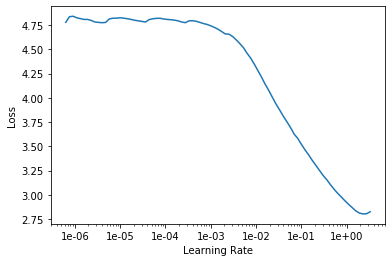

In [ ]:
learn.recorder.plot()

In [ ]:
#learn.fit_one_cycle(1, max_lr=4e-2)
learn.fit_one_cycle(1, max_lr=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,2.080345,0.965508,0.822818,00:01


In [ ]:
learn.save_encoder('pretrained_encoder2')

## Classificador

In [ ]:
data_clas = TextClasDataBunch.from_df(path,
                                      train_df= df[train_bool],
                                      valid_df= df[~train_bool],
                                      tokenizer=tokenizer,
                                      text_cols=1,
                                      bs=24,
                                      vocab=vocab,
                                      max_vocab=35000,
                                      label_cols=0)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
matriculas cursos   iel
  if getattr(ds, 'warn', False): warn(ds.warn)


In [ ]:
data_clas = (TextList.from_df(df, path, vocab=data_lm.vocab, cols='sumario')
    .split_by_rand_pct(0.1, seed=42)
    .label_from_df(cols='assunto')
    .databunch(bs=bs, num_workers=1, backwards=True))

#data_clas.save(f'{lang}_textlist_class_bwd')

In [ ]:
print(type(data_clas.valid_ds.x))

<class 'fastai.text.data.TextList'>


In [ ]:
len(data_clas.valid_ds.x)

671

In [ ]:
clf = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)

In [ ]:
clf.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.849547,1.603969,0.611028,00:21
1,1.885877,2.119954,0.536513,00:23
2,1.918426,2.034831,0.558867,00:24
3,1.499041,1.643718,0.612519,00:24
4,1.368956,1.527953,0.615499,00:22


In [ ]:
clf.data.classes

['ata carnet',
 'banco de talentos',
 'cadastro de fornecedores',
 'cadastro de industrias',
 'capacitacao empresarial',
 'catalogo de exportadores',
 'catalogo de fornecedores',
 'certificados',
 'cod',
 'como se associar',
 'contribuicao social',
 'dificuldade com o ambiente ead',
 'edital de inovacao',
 'elogios agradecimentos',
 'esportes',
 'estagios',
 'estudos e pesquisa',
 'eventos premios',
 'inova talentos',
 'jovem aprendiz',
 'matriculas cursos',
 'matriculas cursos   iel',
 'matriculas cursos   sesi',
 'olimpiada do conhecimento',
 'parceria  patrocinio',
 'programa de qualific  fornecedores  pqf',
 'programas',
 'publicacao',
 'qualidade de vida saude e seguranca no trabalho',
 'reclamacao',
 'rede cin',
 'relacoes do trabalho',
 'sesinho',
 'sugestao',
 'torneio de robotica',
 'wordskills']

In [ ]:
df_sac_2018.columns

Index(['Número da Ocorrência', 'Data de Abertura', 'Descrição',
       'Árvore de Assuntos'],
      dtype='object')

In [ ]:
df_sac_2018["Árvore de Assuntos"].unique().size

17

In [ ]:
df_sac_2018["Árvore de Assuntos"].unique()

array(['Banco de Talentos', 'Cadastro de Indústrias', 'Catálogo de Exportadores', 'Catálogo de Fornecedores',
       'Certificados', 'Como se associar', 'Esportes', 'Estágios', 'Inova Talentos', 'Jovem Aprendiz',
       'Matrículas/Cursos', 'Olimpíada do Conhecimento', 'Outros Assuntos', 'Publicação', 'Relações do Trabalho',
       'Sesinho', nan], dtype=object)

In [ ]:
df_sac["assunto"].unique().size

36

In [ ]:
df_sac[df_sac["assunto"]=="jovem aprendiz"]

,assunto,sumario
523,jovem aprendiz,"Ola, boa tarde eu gostaria de tirar uma dúvida..."
524,jovem aprendiz,Quero me escrever no jovem aprendiz me ajudem ...
525,jovem aprendiz,"Prezado (a), Boa tarde! Gostaria de integrar ..."
526,jovem aprendiz,Olá Boa noite! Gostaria de saber se tem vagas...
527,jovem aprendiz,Queria saber qual Das empresa contra JOvem ap...
...,...,...
6660,jovem aprendiz,Gostaria de saber como faz para participar do ...
6666,jovem aprendiz,Como faço para mim torna um jovem aprendiz par...
6672,jovem aprendiz,somos uma empresa a qual precisamos contratar ...
6682,jovem aprendiz,Como faço para me inscrever no programa jovem ...


In [ ]:
df_sac["sumario"].iloc[6712]

'Gostaria de saber se o Senai está oferecendo vagas de jovem aprendiz 2019.'

In [ ]:
pred = clf.predict('Gostaria de saber como faz para participar do programa jovem aprendiz, os lugares disponíveis no RJ para inscrição não estão disponíveis na página !!'); pred

(Category jovem aprendiz,
 tensor(19),
 tensor([4.3811e-04, 6.9211e-02, 7.9295e-03, 8.2541e-03, 2.5025e-04, 1.6562e-03,
         3.4304e-03, 2.1847e-02, 4.8669e-05, 7.7322e-03, 1.9690e-03, 2.9334e-03,
         1.7607e-04, 6.1778e-05, 9.4253e-04, 6.3520e-03, 6.5844e-03, 3.7362e-03,
         1.9630e-03, 7.8168e-01, 1.3386e-02, 8.1007e-05, 1.0071e-03, 2.5677e-04,
         1.0667e-02, 1.3122e-04, 4.1660e-03, 1.5149e-02, 9.1299e-04, 1.2642e-04,
         2.0030e-04, 2.0765e-02, 3.3759e-03, 2.5880e-04, 2.2835e-03, 3.3726e-05]))

In [ ]:
pred = clf.predict('Gentileza nos informar o e-mail do Sr. Roberto Cavalcanti Diretor CNI. Atenciosamente, Renato Cunha Presidente SINDAÇÚCAR - PE.'); pred

(Category matriculas cursos,
 tensor(20),
 tensor([0.0033, 0.1522, 0.0380, 0.0238, 0.0018, 0.0067, 0.0237, 0.0666, 0.0020,
         0.0268, 0.0101, 0.0588, 0.0038, 0.0016, 0.0094, 0.0238, 0.0194, 0.0203,
         0.0059, 0.0222, 0.2412, 0.0023, 0.0223, 0.0034, 0.0478, 0.0017, 0.0226,
         0.0521, 0.0080, 0.0038, 0.0039, 0.0370, 0.0119, 0.0028, 0.0184, 0.0007]))

In [ ]:
pred = clf.predict('Como faço pra mim se escrever no menor aprendiz ?'); pred

(Category jovem aprendiz,
 tensor(19),
 tensor([9.5073e-04, 1.5203e-01, 1.9236e-02, 1.3358e-02, 4.3202e-04, 3.0167e-03,
         5.9122e-03, 4.7426e-02, 1.4278e-04, 1.5952e-02, 5.1566e-03, 1.2374e-02,
         6.6915e-04, 1.6529e-04, 2.1529e-03, 1.4765e-02, 1.4976e-02, 7.4808e-03,
         3.5957e-03, 4.8564e-01, 6.7172e-02, 2.5734e-04, 4.1878e-03, 6.1565e-04,
         2.3496e-02, 2.6172e-04, 1.0558e-02, 3.7523e-02, 1.9603e-03, 4.6748e-04,
         4.8323e-04, 3.2345e-02, 8.5343e-03, 4.9400e-04, 6.1407e-03, 7.0195e-05]))

In [ ]:
pred = clf.predict('Nome: Adriana Medeiros E-mail: adriana@grupoautentica.com.br Telefone: (31) 99828-1240 UF: MG Cidade: Belo Horizonte Assunto: informacao Categoria de Usuario: estudante Instituição: CNI Empresa: Mensagem: Boa tarde! Gostaria de saber onde faço inscrição para meu filho para trabalhar como Jovem Aprendiz no Senai ? Enviado em: 06/02/2018 15:04'); pred

(Category jovem aprendiz,
 tensor(19),
 tensor([1.6036e-03, 1.3785e-01, 2.4723e-02, 2.2147e-02, 1.0116e-03, 4.4108e-03,
         1.4414e-02, 5.6376e-02, 3.5619e-04, 2.0965e-02, 5.9398e-03, 1.1045e-02,
         8.2741e-04, 4.1358e-04, 3.4096e-03, 1.4285e-02, 1.6380e-02, 1.1218e-02,
         4.4321e-03, 4.4344e-01, 4.5303e-02, 4.4897e-04, 4.1115e-03, 1.1733e-03,
         3.3150e-02, 6.8496e-04, 1.2151e-02, 3.7974e-02, 3.3609e-03, 6.7601e-04,
         1.1192e-03, 4.5475e-02, 9.9506e-03, 1.2779e-03, 7.6851e-03, 2.0580e-04]))

In [ ]:
pred = clf.predict('Bom dia. Sou funcionária terceirizada da empresa ÁGIL, lotada no MDIC - Ministério da Indústria, Comércio Exterior e Serviços, no Gabinete da Secretária de Inovação e Novos Negócios, e gostaria de saber como devo proceder para encaminhar um curriculum vitae para a CNI, na tentativa de uma vaga na área de secretariado executivo.')

In [ ]:
pred[0]

Category banco de talentos

In [ ]:
def incluir_arvore_de_assunto (descricao): 
  pred = clf.predict(descricao)
  return pred[0]

In [ ]:
df_sac_outro_assuntos.head()

,Assunto,Descricao
Titulo,,
Solicitação de ajuste em texto do Portal da Indústria,outros assuntos,Na página: https://noticias.portaldaindustria....
Dados de Presidente de federação,outros assuntos,Gentileza nos informar o e-mail do Sr. Roberto...
Negociação de dívida,outros assuntos,Boa tarde. Gostaria de solicitar uma negociaçã...
Reclamação sobre relação de consumo diverso ao Sistema Indústria,outros assuntos,"""Bom dia Estou com um grave problema sou clien..."
Manifestação,outros assuntos,Como o governo Jair Bolsonaro irá vender a Ra...


In [ ]:
df_sac_outro_assuntos["Árvore de Assuntos"] = df_sac_outro_assuntos["Descricao"].apply(incluir_arvore_de_assunto)


In [ ]:
df_sac_2017["Árvore de Assuntos"] = df_sac_2017["Descrição_new"].apply(incluir_arvore_de_assunto)


In [ ]:
df_sac_outro_assuntos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, Solicitação de ajuste em texto do Portal da Indústria to Informações diversas
Data columns (total 3 columns):
Assunto               495 non-null object
Descricao             495 non-null object
Árvore de Assuntos    495 non-null object
dtypes: object(3)
memory usage: 15.5+ KB


In [ ]:
df_sac_outro_assuntos.head()

,Assunto,Descricao,Árvore de Assuntos
Titulo,,,
Solicitação de ajuste em texto do Portal da Indústria,outros assuntos,Na página: https://noticias.portaldaindustria....,matriculas cursos
Dados de Presidente de federação,outros assuntos,Gentileza nos informar o e-mail do Sr. Roberto...,matriculas cursos
Negociação de dívida,outros assuntos,Boa tarde. Gostaria de solicitar uma negociaçã...,matriculas cursos
Reclamação sobre relação de consumo diverso ao Sistema Indústria,outros assuntos,"""Bom dia Estou com um grave problema sou clien...",matriculas cursos
Manifestação,outros assuntos,Como o governo Jair Bolsonaro irá vender a Ra...,banco de talentos


In [ ]:
df_sac_outro_assuntos.to_excel("drive/My Drive/ia_projects/cni_ouvidoria/datasets/df_sac_2018_2019_outros_assuntos.xlsx",encoding="utf-8",index=False)

In [ ]:
df_sac[['Árvore de Assuntos','Descrição']].groupby(['Árvore de Assuntos'])['Descrição'].count().nlargest(20)

In [ ]:
df_sac_outro_assuntos['Árvore de Assuntos'].unique()

array([Category matriculas cursos, Category banco de talentos, Category jovem aprendiz], dtype=object)

In [ ]:
df_sac_2017.to_excel("drive/My Drive/ia_projects/cni_ouvidoria/datasets/df_sac_2017_arvore_assunto2.xlsx",encoding="utf-8",index=False)

In [ ]:
valid_df2= df[~train_bool]

In [ ]:
valid_df2.sample().values[0]

array(['no-reply@portaldaindustria.com.br\n9 de ago (Há 1 dia)\npara sac \nNome: Jorgecimara\nEmail: maraf.figueiredo \nTelefone: \nCelular: \nCPF: \nUF: None\nCNPJ: \nCompany Name: \nMensagem: Não estou conseguindo Logar nos cursos à distância! \nAparece uma mensagem " Usuário bloqueado".',
       'matriculas cursos'], dtype=object)